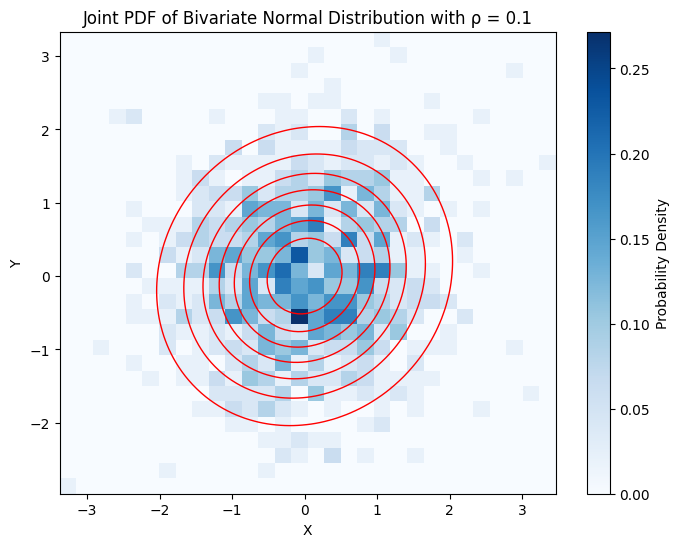

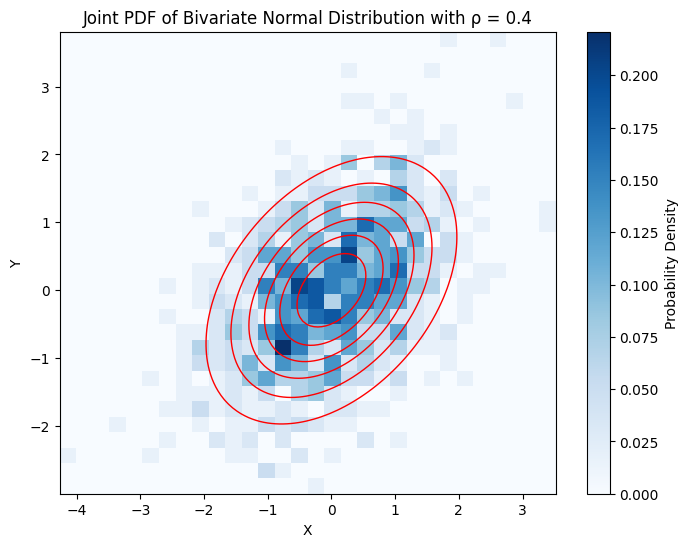

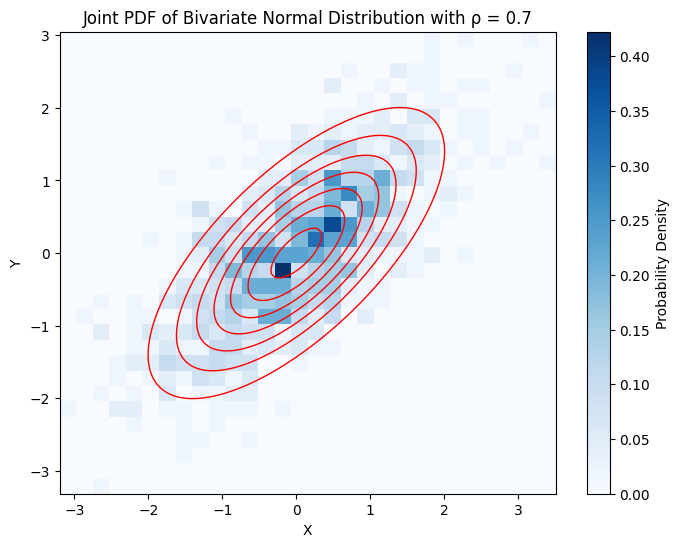

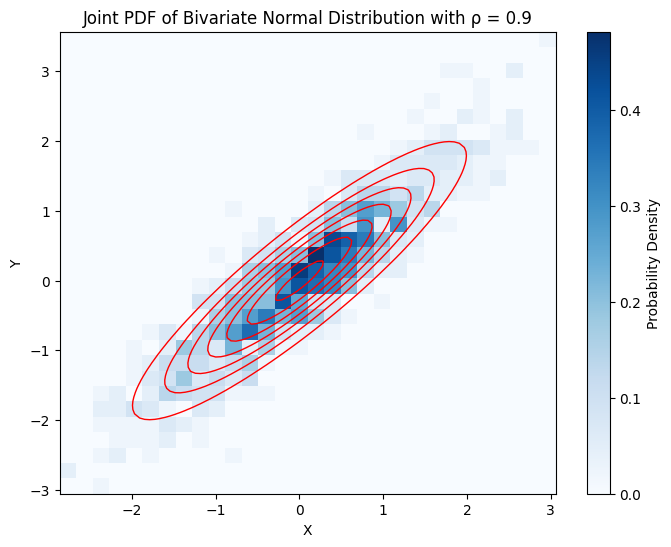

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bivariate_normal(rho):
    # Define parameters
    mean = [0, 0]
    cov = [[1, rho], [rho, 1]]  # covariance matrix

    # Generate samples from standard normal distribution
    z = np.random.normal(0, 1, 1000)
    w = np.random.normal(0, 1, 1000)

    # Transform samples to bivariate normal distribution
    x = z
    y = rho * z + np.sqrt(1 - rho**2) * w

    # Plot joint PDF
    plt.figure(figsize=(8, 6))
    plt.hist2d(x, y, bins=30, density=True, cmap='Blues')
    plt.colorbar(label='Probability Density')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Joint PDF of Bivariate Normal Distribution with ρ = {}'.format(rho))

    # Plot isocontour
    x_range = np.linspace(-3, 3, 100)
    y_range = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.exp(-(X**2 + Y**2 - 2 * rho * X * Y) / (2 * (1 - rho**2))) / (2 * np.pi * np.sqrt(1 - rho**2))
    plt.contour(X, Y, Z, colors='red', linewidths=1)
    plt.show()

# Generate and plot for each rho value
rhos = [0.1, 0.4, 0.7, 0.9]
for rho in rhos:
    plot_bivariate_normal(rho)


In [5]:
import numpy as np

# Function to calculate N for a given sample of U values
def calculate_N(U):
    product = 1
    for i, u in enumerate(U, 1):
        product *= u
        if product < np.exp(-1):
            return i - 1  # Return the index of the last element where the product was less than e^-1
    return len(U)  # If the product never goes below e^-1, return the total count of U values

# Generate 5000 samples of N
sample_size = 5000
Ns = []

for _ in range(sample_size):
    U = np.random.uniform(0, 1, 1000)  # Generate 1000 uniform random variables
    N = calculate_N(U)
    Ns.append(N)

# (a) Estimate E(N) using sample mean
mean_N = np.mean(Ns)
print("Estimated E(N):", mean_N)

# (b) Estimate Var(N) using sample variance
var_N = np.var(Ns)
print("Estimated Var(N):", var_N)

# (c) Estimate P(N = i) for i = 0, 1, 2, 3
counts = np.bincount(Ns)
probabilities = counts / sample_size
for i, prob in enumerate(probabilities):
    print("Estimated P(N = {}): {:.4f}".format(i, prob))


Estimated E(N): 0.9896
Estimated Var(N): 1.0118918399999999
Estimated P(N = 0): 0.3754
Estimated P(N = 1): 0.3654
Estimated P(N = 2): 0.1780
Estimated P(N = 3): 0.0610
Estimated P(N = 4): 0.0166
Estimated P(N = 5): 0.0030
Estimated P(N = 6): 0.0004
Estimated P(N = 7): 0.0002
